# Importing The Libraries 📚

In [1]:
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Lode The Dataset

In [ ]:
df = pd.read_csv(r"D:\Winter_Arc_Projects\Telecom-Customer-Churn-Prediction\NoteBook\telecom_customer_churn.csv", encoding='utf-8')

In [3]:
df.head().style.background_gradient(cmap = "PuBu")

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,nan,Yes,42.390000,No,Yes,Cable,16.000000,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.600000,593.300000,0.000000,0,381.510000,974.810000,Stayed,nan,nan
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,nan,Yes,10.690000,Yes,Yes,Cable,10.000000,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.000000,542.400000,38.330000,10,96.210000,610.280000,Stayed,nan,nan
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.650000,No,Yes,Fiber Optic,30.000000,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.900000,280.850000,0.000000,0,134.600000,415.450000,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.820000,No,Yes,Fiber Optic,4.000000,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.000000,1237.850000,0.000000,0,361.660000,1599.510000,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,nan,Yes,7.380000,No,Yes,Fiber Optic,11.000000,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900000,267.400000,0.000000,0,22.140000,289.540000,Churned,Dissatisfaction,Network reliability


# Understand the Dataset 🔍
* Check basic details.

* Check for missing values.

In [4]:
from colorama import Fore, Style

# Print the shape of the dataframe (number of rows and columns)
print(Fore.CYAN + "df shape: " + Style.RESET_ALL)
print(f"{df.shape}\n")

# Print basic information about the dataframe (column names, data types, non-null values)
print(Fore.GREEN + "df info: " + Style.RESET_ALL)
print(f"{df.info()}\n") 

# Print the count of missing (NaN) values in each column
print(Fore.YELLOW + "df isnull sum: " + Style.RESET_ALL)
print(f"{df.isnull().mean()}\n")

# Print summary statistics for numerical columns (count, mean, std, min, max, etc.)
print(Fore.MAGENTA + "df describe: " + Style.RESET_ALL)
print(f"{df.describe()}\n")

df shape: 
(7043, 38)

df info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                  

In [5]:
# define the numerical and categorical columns
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include=["object","bool"]).columns

print(f" We have features: {len(numerical_cols)} numerical features {numerical_cols}")
print("-"*150)
print(f" We have features: {len(categorical_cols)} categorical features {categorical_cols}")

 We have features: 15 numerical features Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------
 We have features: 23 categorical features Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', '

* Let me clean the data by converting columns into snake case and removing irrelevant features.

In [6]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
df.drop(columns = ['customer_id', 'zip_code', 'latitude', 'longitude'], inplace = True)

# Define the Problem
> A revenue loss of 3.68M (accounting for 17% of the total revenue) is expected due to the customer churn rate of 26.54% (1869 out of 7043 customers). There appears to be significantly more churn among low-spending customers.

# Identify Causes for Churning
* Row labels attributed to customers who 'Joined' will not be included for analysis in order to reduce noise in the visualizations while allowing for effective visual contrast between customers who 'Churned' and those who 'Stayed'

In [7]:
dfc = df.loc[df.customer_status != 'Joined']

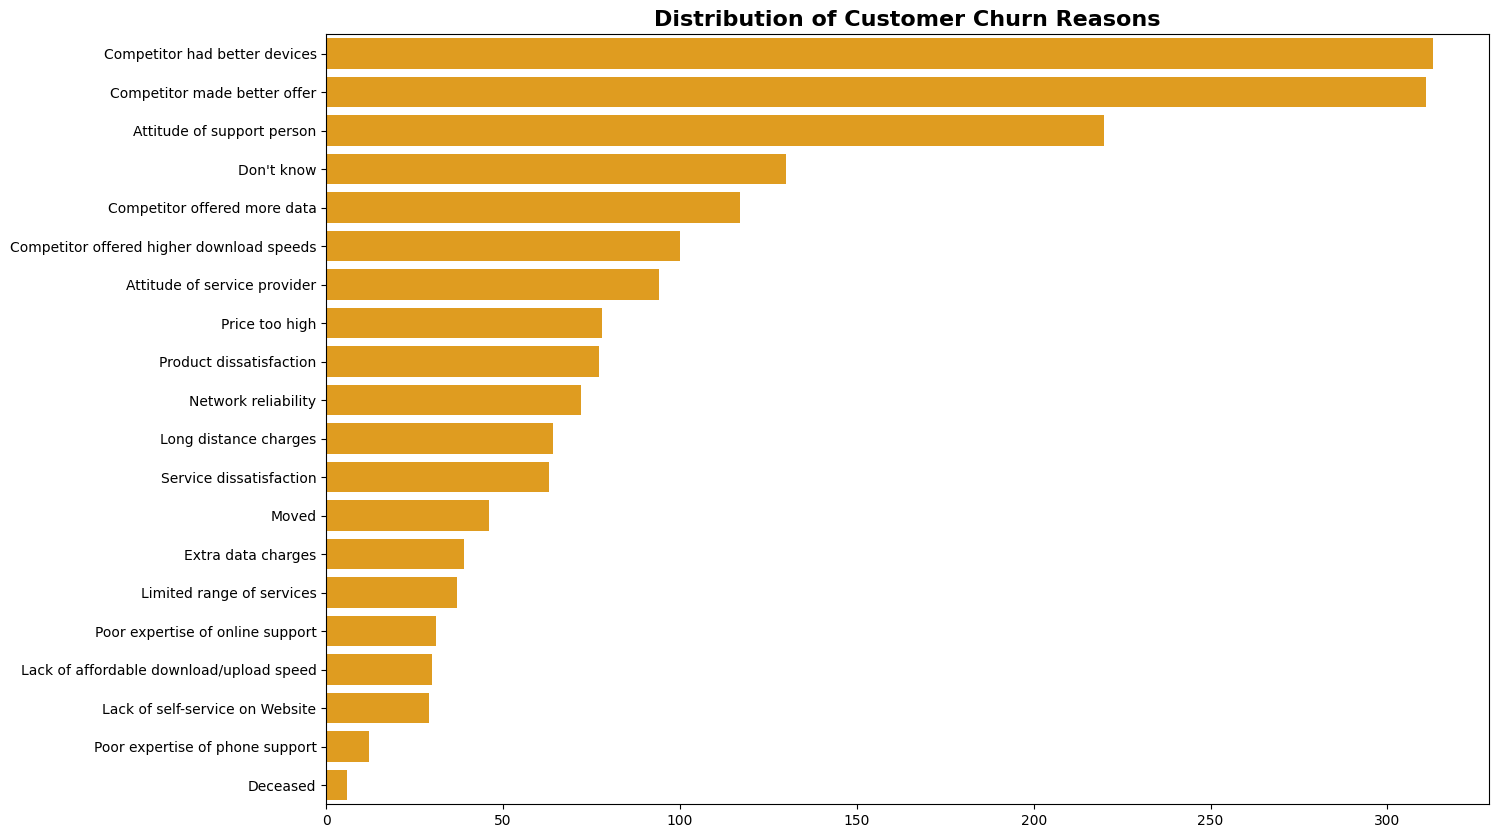

In [8]:
# ✅ Set the figure size for the chart
fig = plt.figure(figsize=(15, 10))

#  Create a horizontal count plot showing the frequency of each churn reason
# 'order' ensures bars are sorted by their count (most common at the top)
# 'color' sets a consistent aesthetic color for all bars
ax = sns.countplot(
    data=dfc,
    y='churn_reason',
    order=dfc['churn_reason'].value_counts().index,
    color="orange"
)

# Remove x and y axis labels for a cleaner look
ax.set(xlabel=None, ylabel=None)

#  Add a descriptive title to the chart
plt.title('Distribution of Customer Churn Reasons', fontsize=16, fontweight='bold')

plt.show()


# Exploratory Data Analysis

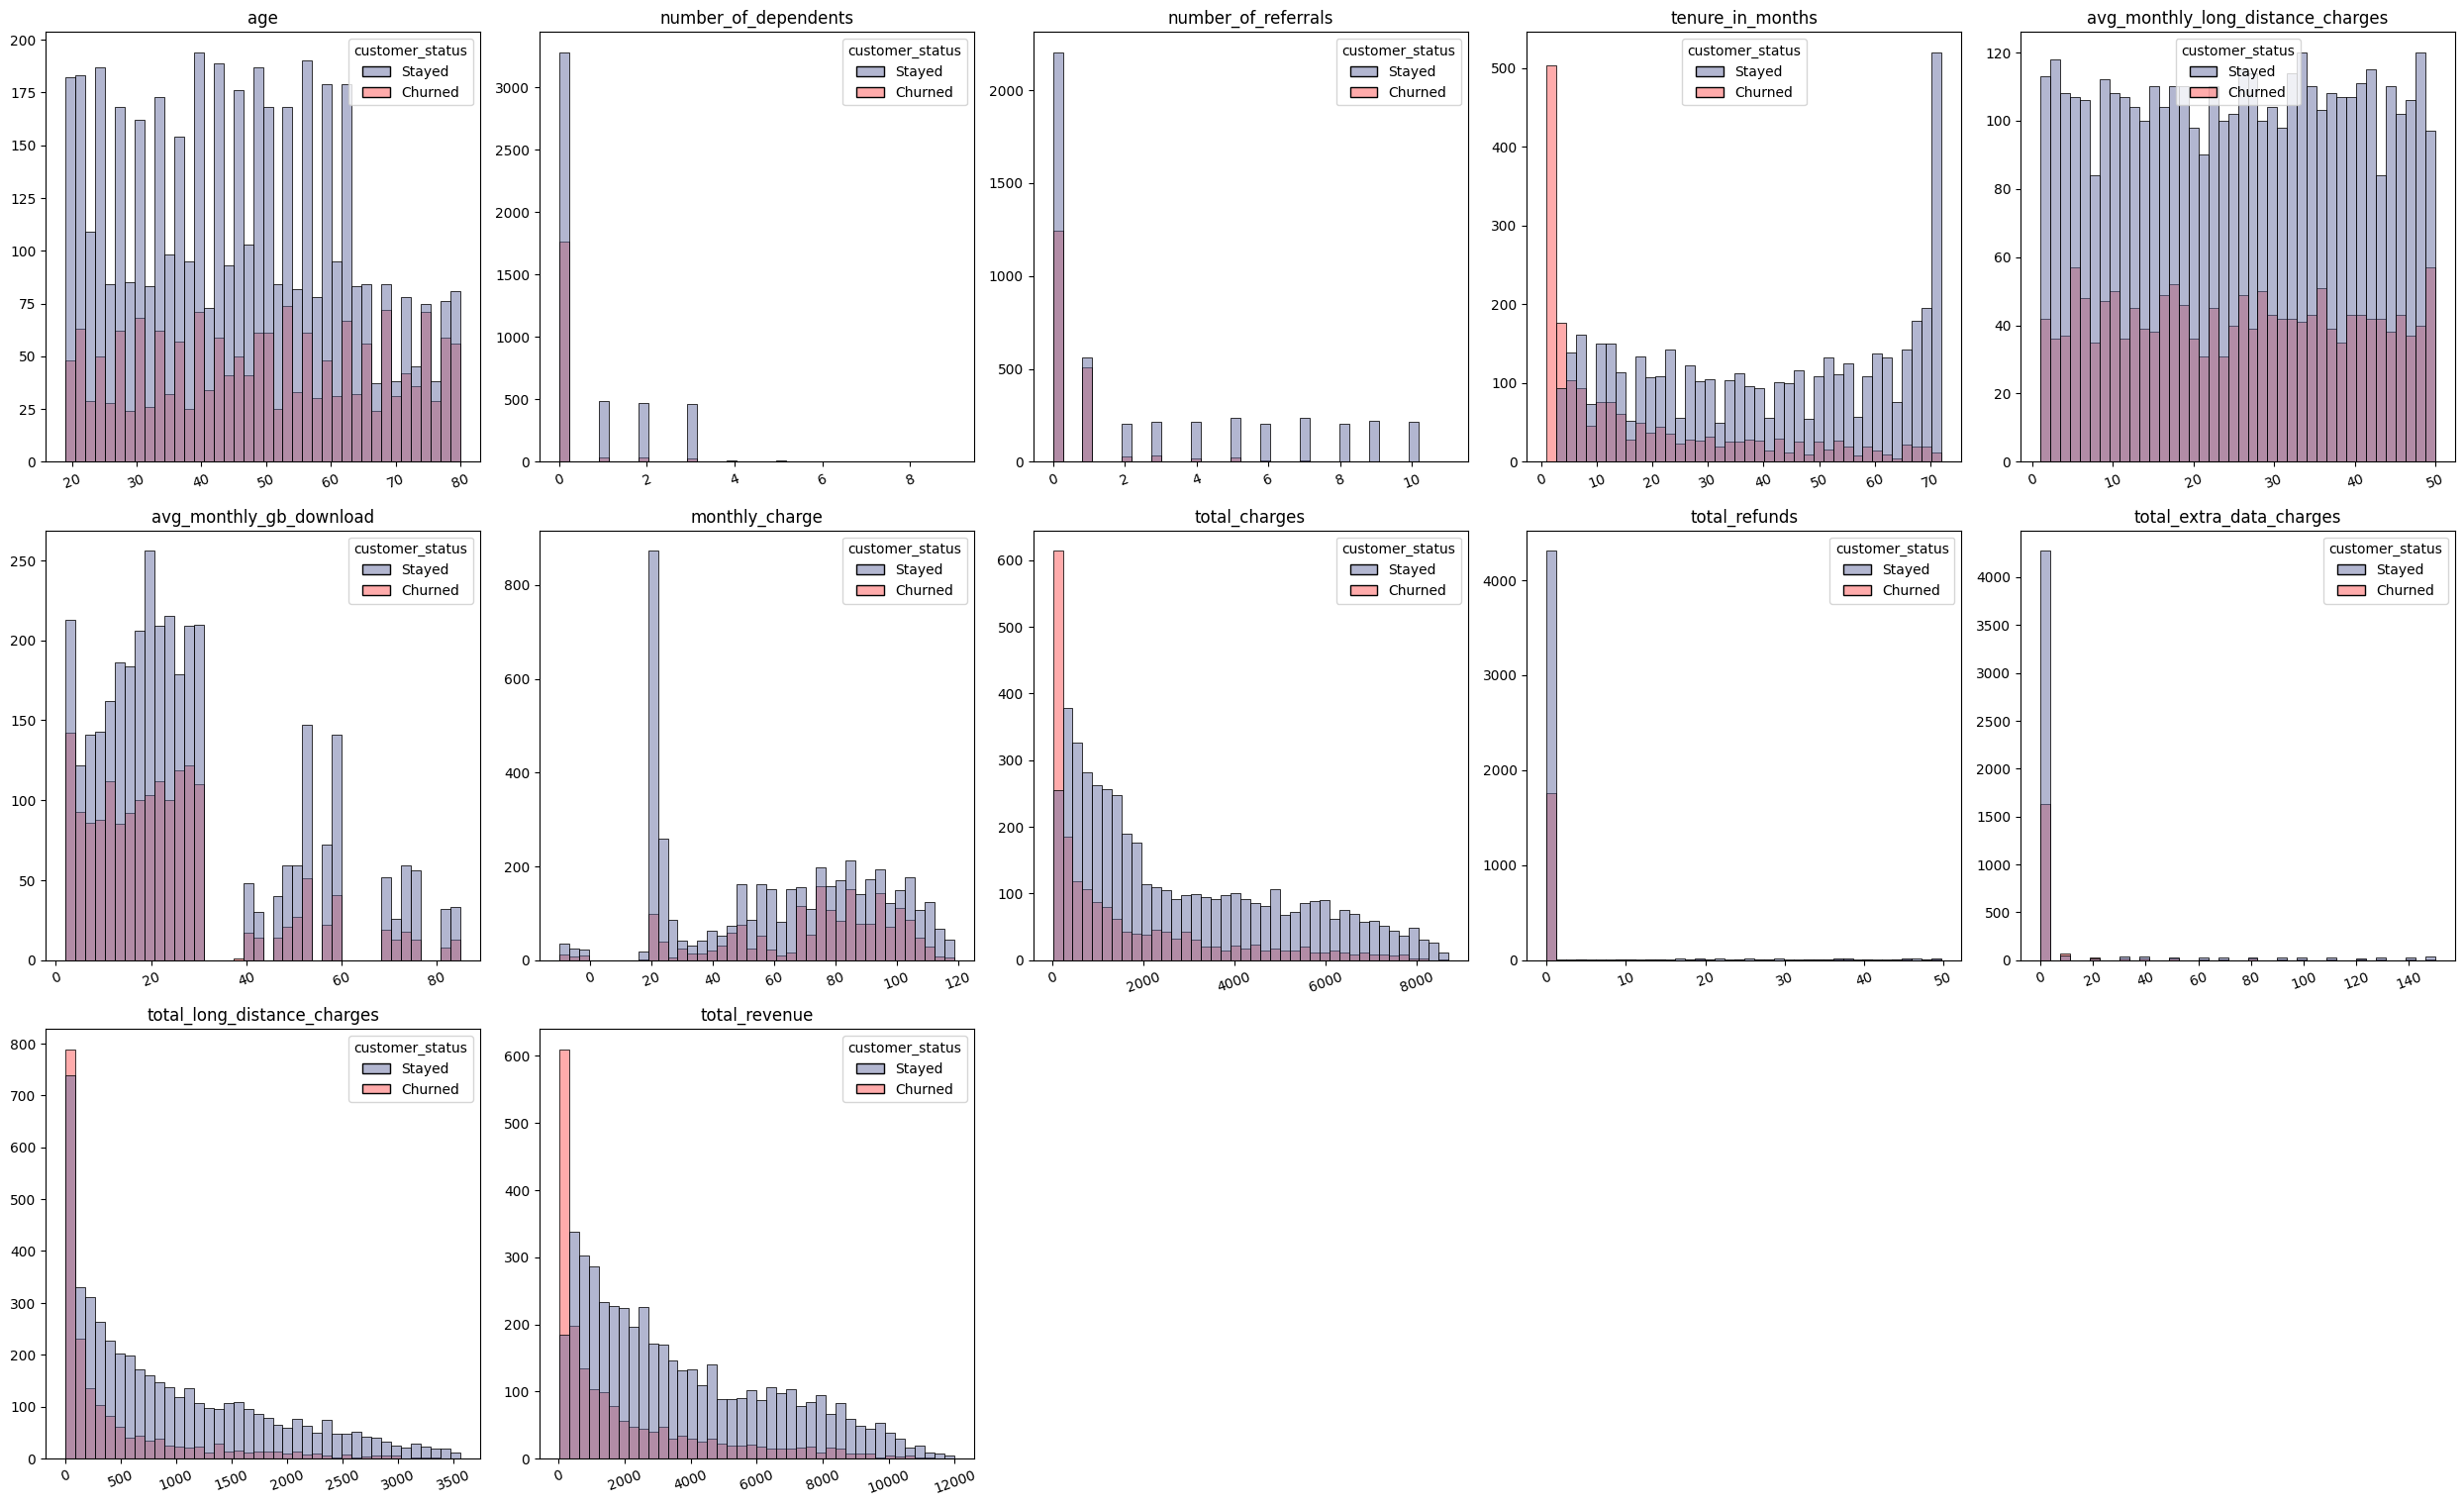

In [9]:
#  Select all numerical columns (integer or float types) from the DataFrame
num = [cname for cname in dfc.columns if dfc[cname].dtype in ['int64', 'float64']]

dfc_num = dfc[num]

fig = plt.figure(figsize=(25, 25))

i = 1  # Counter for subplot indexing

# Loop through each numerical column to create a histogram
for n in dfc_num.columns:
    plt.subplot(5, 5, i)  # Create a 5x5 grid of subplots (adjust as needed)

    ax = sns.histplot(
        x=dfc[n],
        hue=dfc['customer_status'],
        palette=['#676FA3', '#FF5959'],
        bins=40
    )
    
    # Remove axis labels to keep plots clean
    ax.set(xlabel=None, ylabel=None)
    
    # ✅ Add column name as the title for each subplot
    plt.title(str(n), loc='center')
    
    # ✅ Rotate x-axis labels slightly for readability
    plt.xticks(rotation=20, fontsize=10)
    
    i += 1  # Move to next subplot

plt.tight_layout()
plt.show()


# nsights
> tenure_in_months: Customer churn rate is highest within the first few months (5) of subscribing to the service.
> total_charges and revenue: In relation to their short duration of subscription, total amount charged to churned customers are relatively low compared to those who stayed, hence, lower revenue garnered.

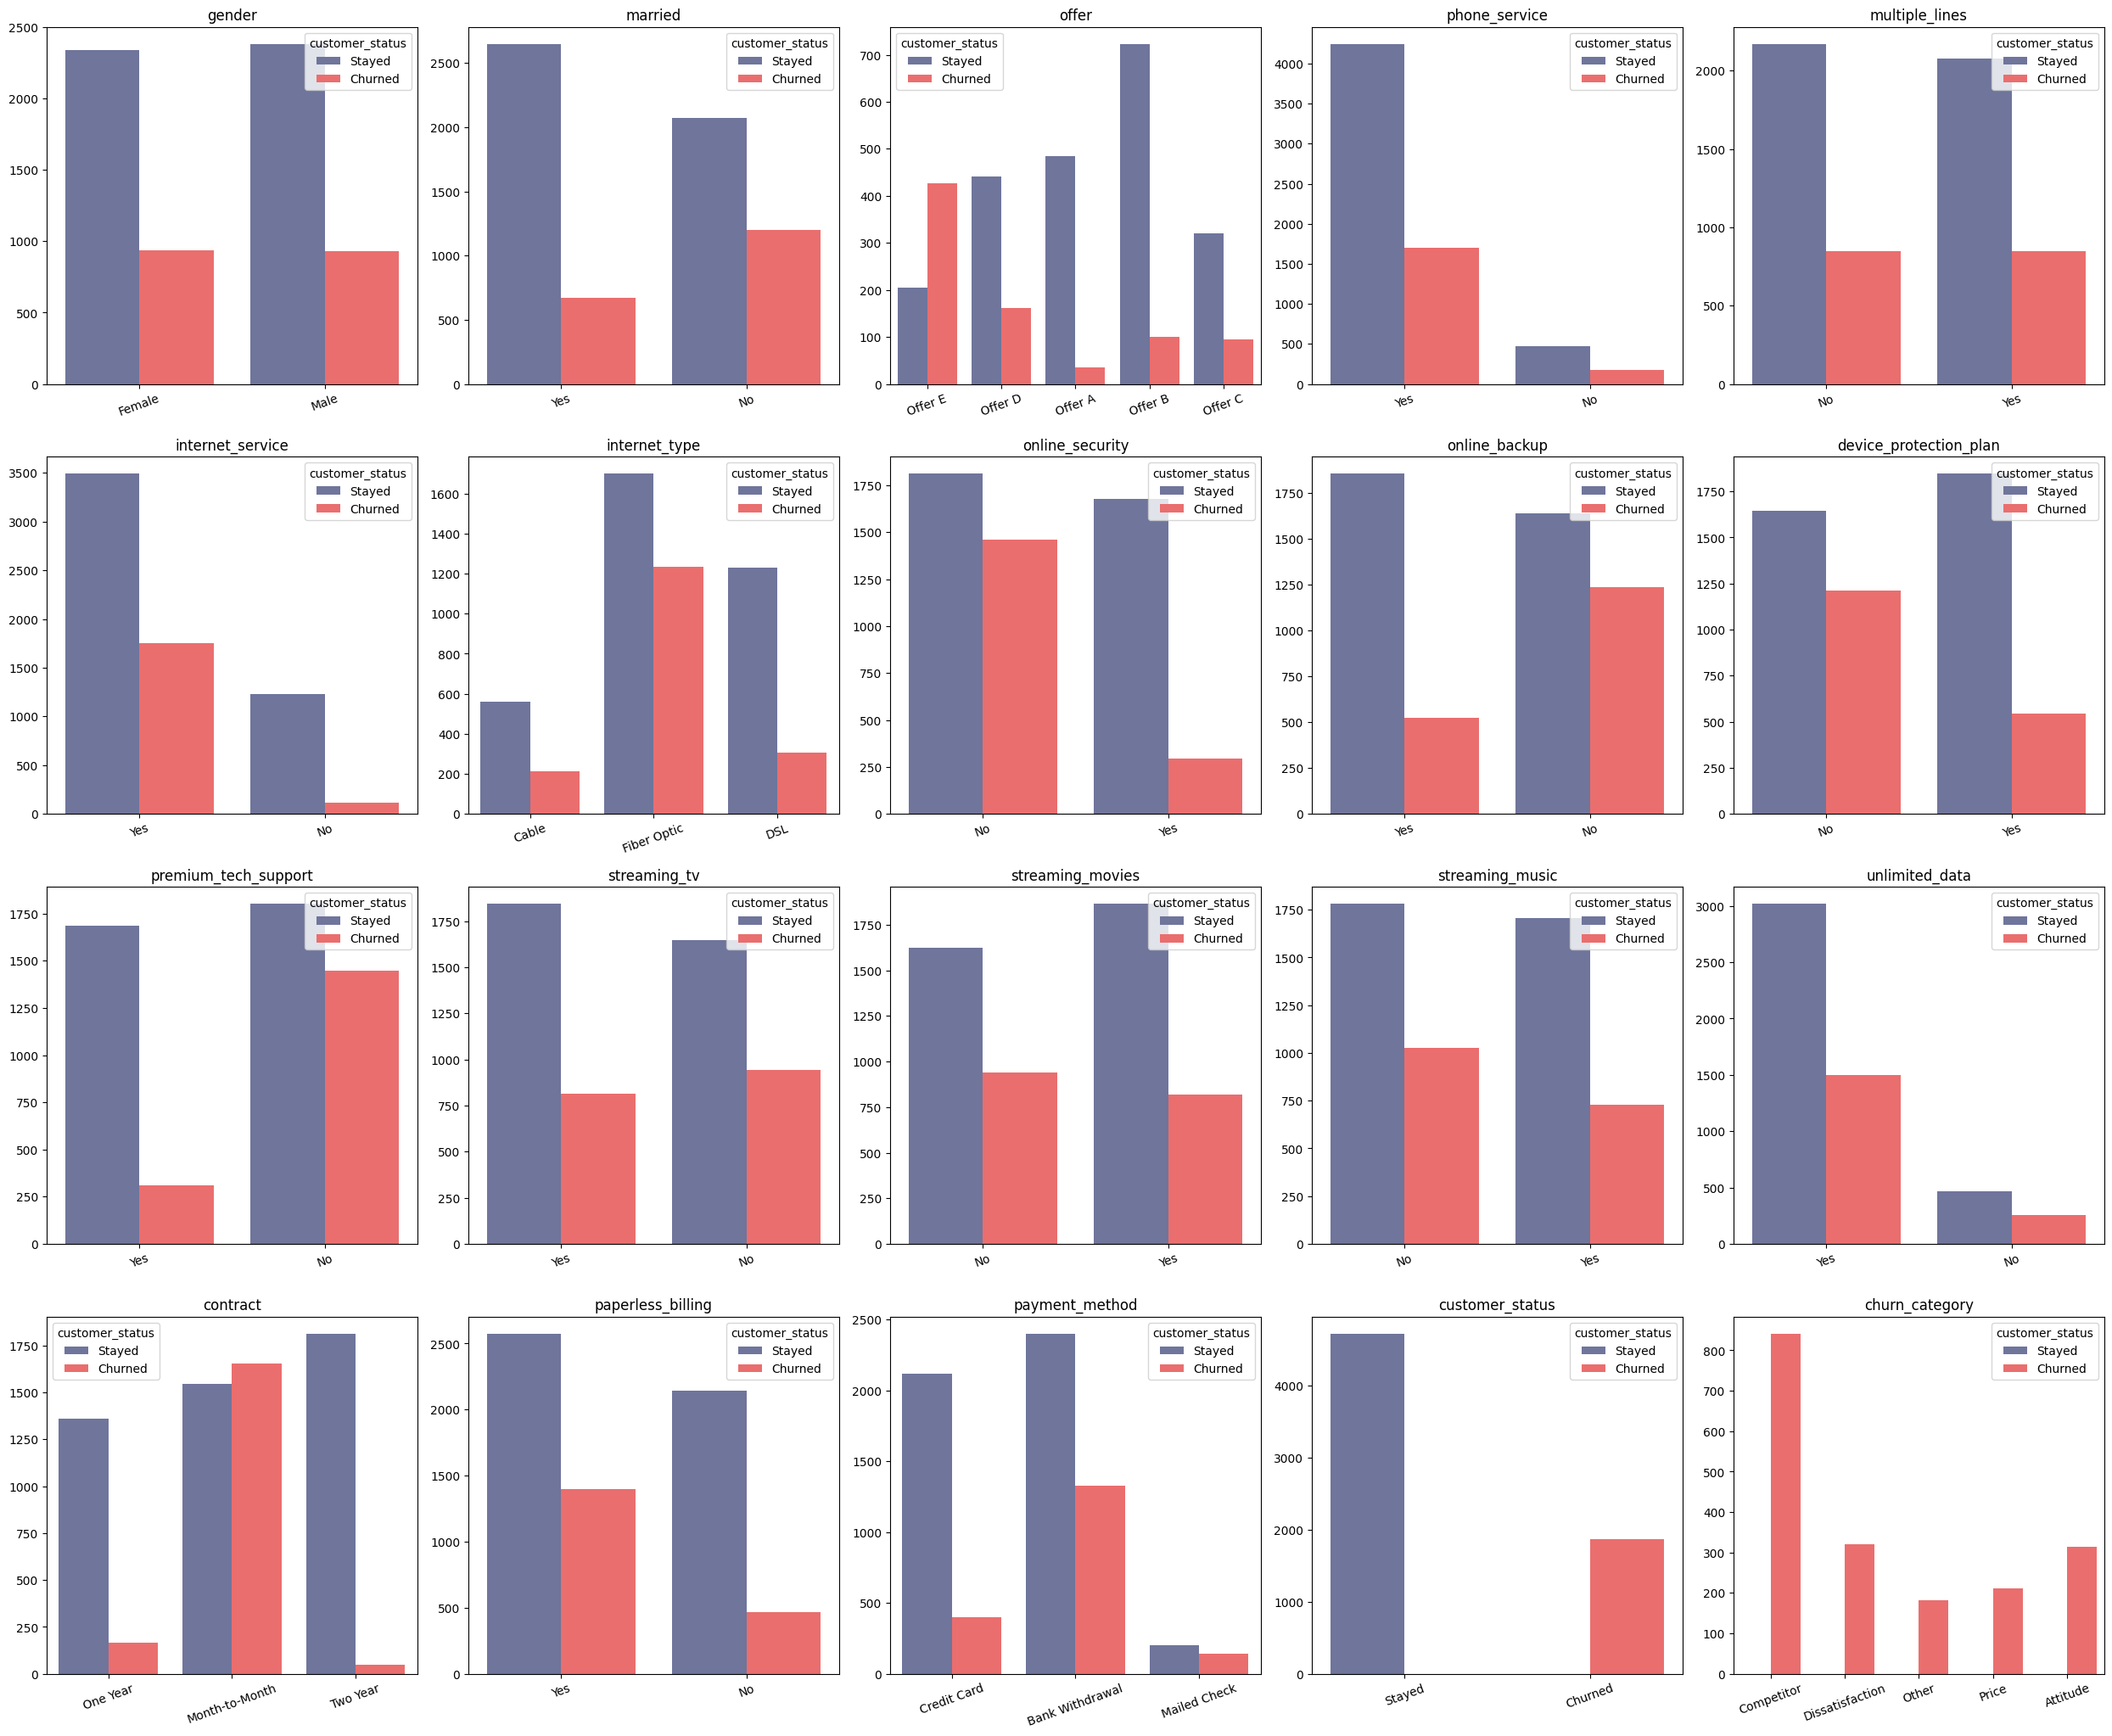

In [10]:
#  Select all categorical columns with fewer than 10 unique values
# This filters out high-cardinality columns that are hard to visualize
cat = [cname for cname in dfc.columns if dfc[cname].nunique() < 10 and dfc[cname].dtype == "object"]

dfc_cat = dfc[cat]
fig = plt.figure(figsize=(25, 25))

i = 1
#  Loop through each categorical column and plot its distribution
for c in dfc_cat.columns:
    plt.subplot(5, 5, i)  # Create a grid of subplots (5x5 layout)
    ax = sns.countplot(
        data=dfc_cat,
        x=c,
        hue='customer_status',
        palette=['#676FA3', '#FF5959']
    )
    
    #Remove axis labels for cleaner visuals
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    plt.xticks(rotation=20, fontsize=10)
    
    i += 1  # Move to next subplot
plt.tight_layout()
plt.show()


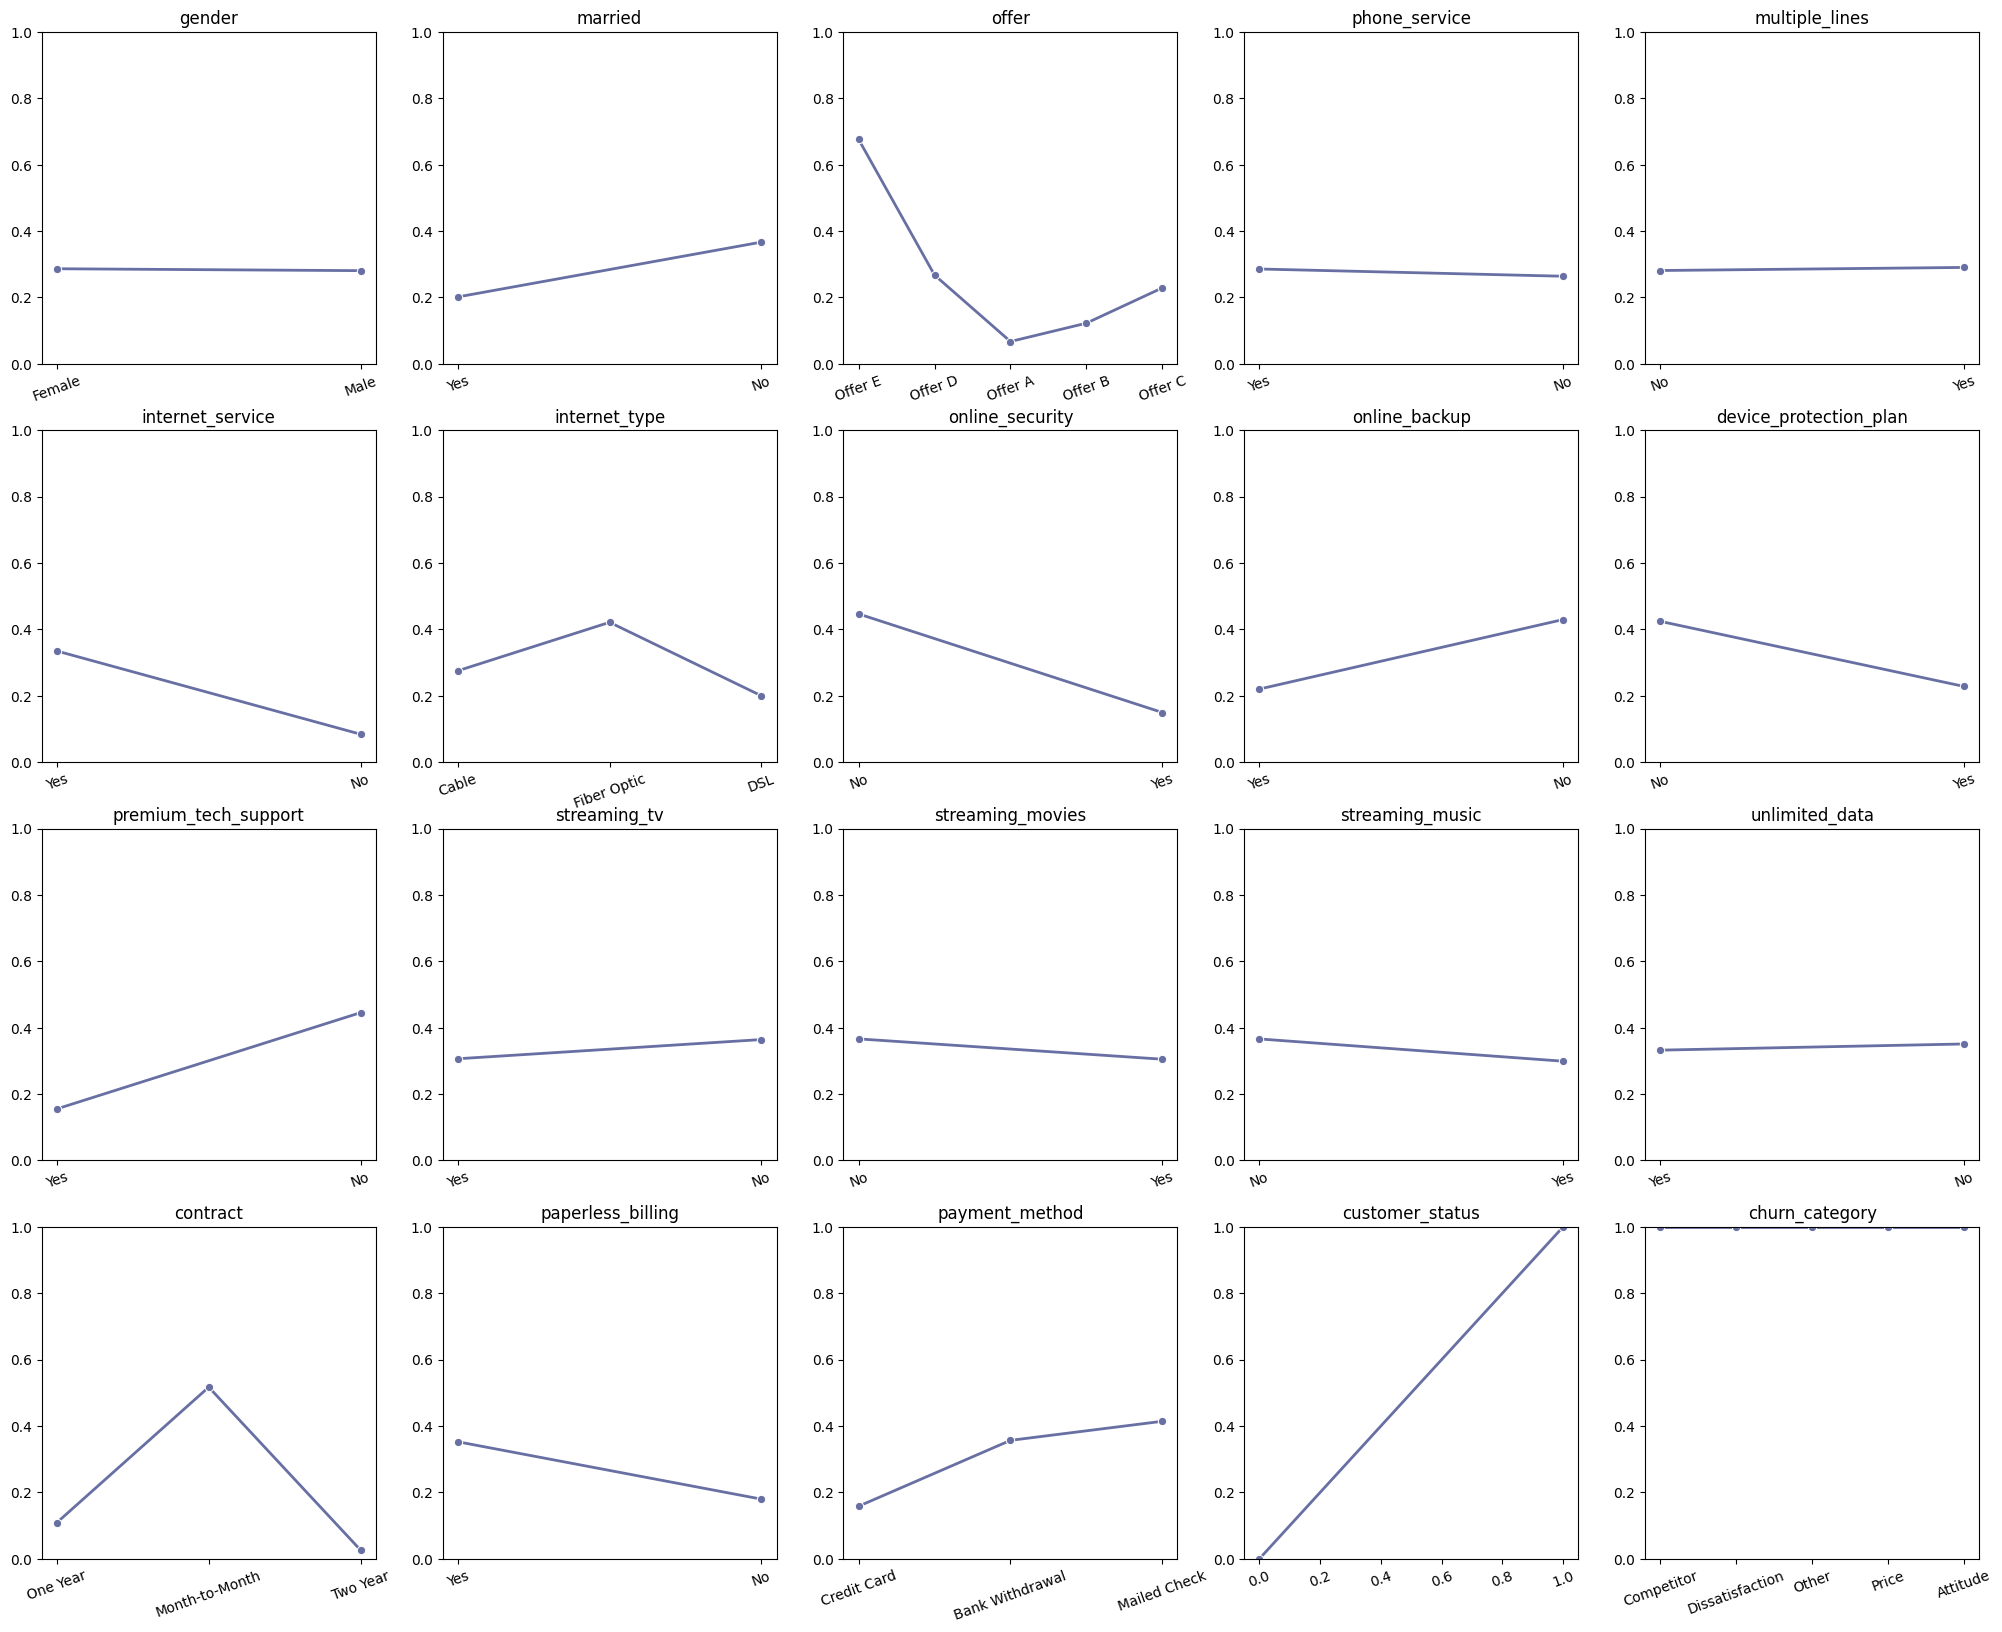

In [11]:
# Convert 'customer_status' from text labels to binary (0 = Stayed, 1 = Churned)
dfc.loc[dfc.customer_status == 'Stayed', 'customer_status'] = 0
dfc.loc[dfc.customer_status == 'Churned', 'customer_status'] = 1

# Split categorical and numerical features for separate analysis
dfc_cat = dfc[cat]
dfc_num = dfc[num]

fig = plt.figure(figsize=(25, 25))  # Set overall figure size

i = 1
for c in dfc_cat.columns:
    plt.subplot(5, 5, i)  # Create subplot grid
    
    # Plot line showing relationship between each categorical feature and churn status
    ax = sns.lineplot(
        data=dfc_cat,
        x=dfc_cat[c],
        y=dfc_cat['customer_status'],
        linewidth=2,
        marker='o',
        ci=None,
        color='#676FA3'
    )
    
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')
    plt.ylim(0, 1)
    plt.xticks(rotation=20, fontsize=10)
    i += 1


# Insights
* offer: Most customers didn't accept marketing offers. The marketing team may want to improve on this low conversion rate. Unfortunately, no information was provided about the complete details of each offer, although we do observe high customer churn rate after subscribing to Offer E.
* internet_service. Higher churn rate with subscriptions to the internet service. Anecdotally, there are several causes related to internet services that can lead to customer dissatisfaction. One of the most frequent examples includes slow internet connection.
* internet_type: Of the various internet connection types, Fiber Optic is the most popular, for it has the fastest download and upload speeds compared to cable and DSL at the expense of higher prices. However, Fiber Optic users are also the most likely to discontinue the connection service.
* contract: It makes sense that contracts set for longer timeframes, either up to one or two years, discourage subscribers from discontinuing their service. On the contrary, users are likely to churn if they opt to pay at a monthly basis.
* Subscribing to any of the additional internet services (i.e., online security, backup, device protection plan, etc.) appears to reduce the customer churn rate by a certain percentage considerably.

## High-Value Customers vs Churned Customers¶
* Customers who contributed above the average revenue of the company and those who stayed are treated as high-value and loyal customers.

In [12]:
dfc['total_revenue'].mean()

3235.2180816512364

In [13]:
dfc['high_value'] = 0
dfc.loc[(dfc['total_revenue'] > 3235.2180816512373) & (dfc['customer_status'] == 0), 'high_value'] = 'High Value'

* High-value customers belong to the top 33.34%.

In [14]:
dfc.high_value.value_counts()

high_value
0             4392
High Value    2197
Name: count, dtype: int64

In [15]:
df_high_value = dfc[dfc.high_value == 'High Value']
df_high_value.head()

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,high_value
6,Female,67,Yes,0,Lompoc,1,71,Offer A,Yes,9.96,...,109.70,7904.25,0.0,0,707.16,8611.41,0,NaN,NaN,High Value
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,84.65,5377.80,0.0,20,816.48,6214.28,0,NaN,NaN,High Value
9,Female,43,Yes,1,Sheridan,3,65,NaN,Yes,28.46,...,90.45,5957.90,0.0,0,1849.90,7807.80,0,NaN,NaN,High Value
11,Female,25,Yes,2,Sunnyvale,2,72,NaN,Yes,16.01,...,116.80,8456.75,0.0,0,1152.72,9609.47,0,NaN,NaN,High Value
13,Female,32,No,0,La Mesa,0,72,Offer A,Yes,2.25,...,101.30,7261.25,0.0,0,162.00,7423.25,0,NaN,NaN,High Value


> **High-Value Customers Profile**

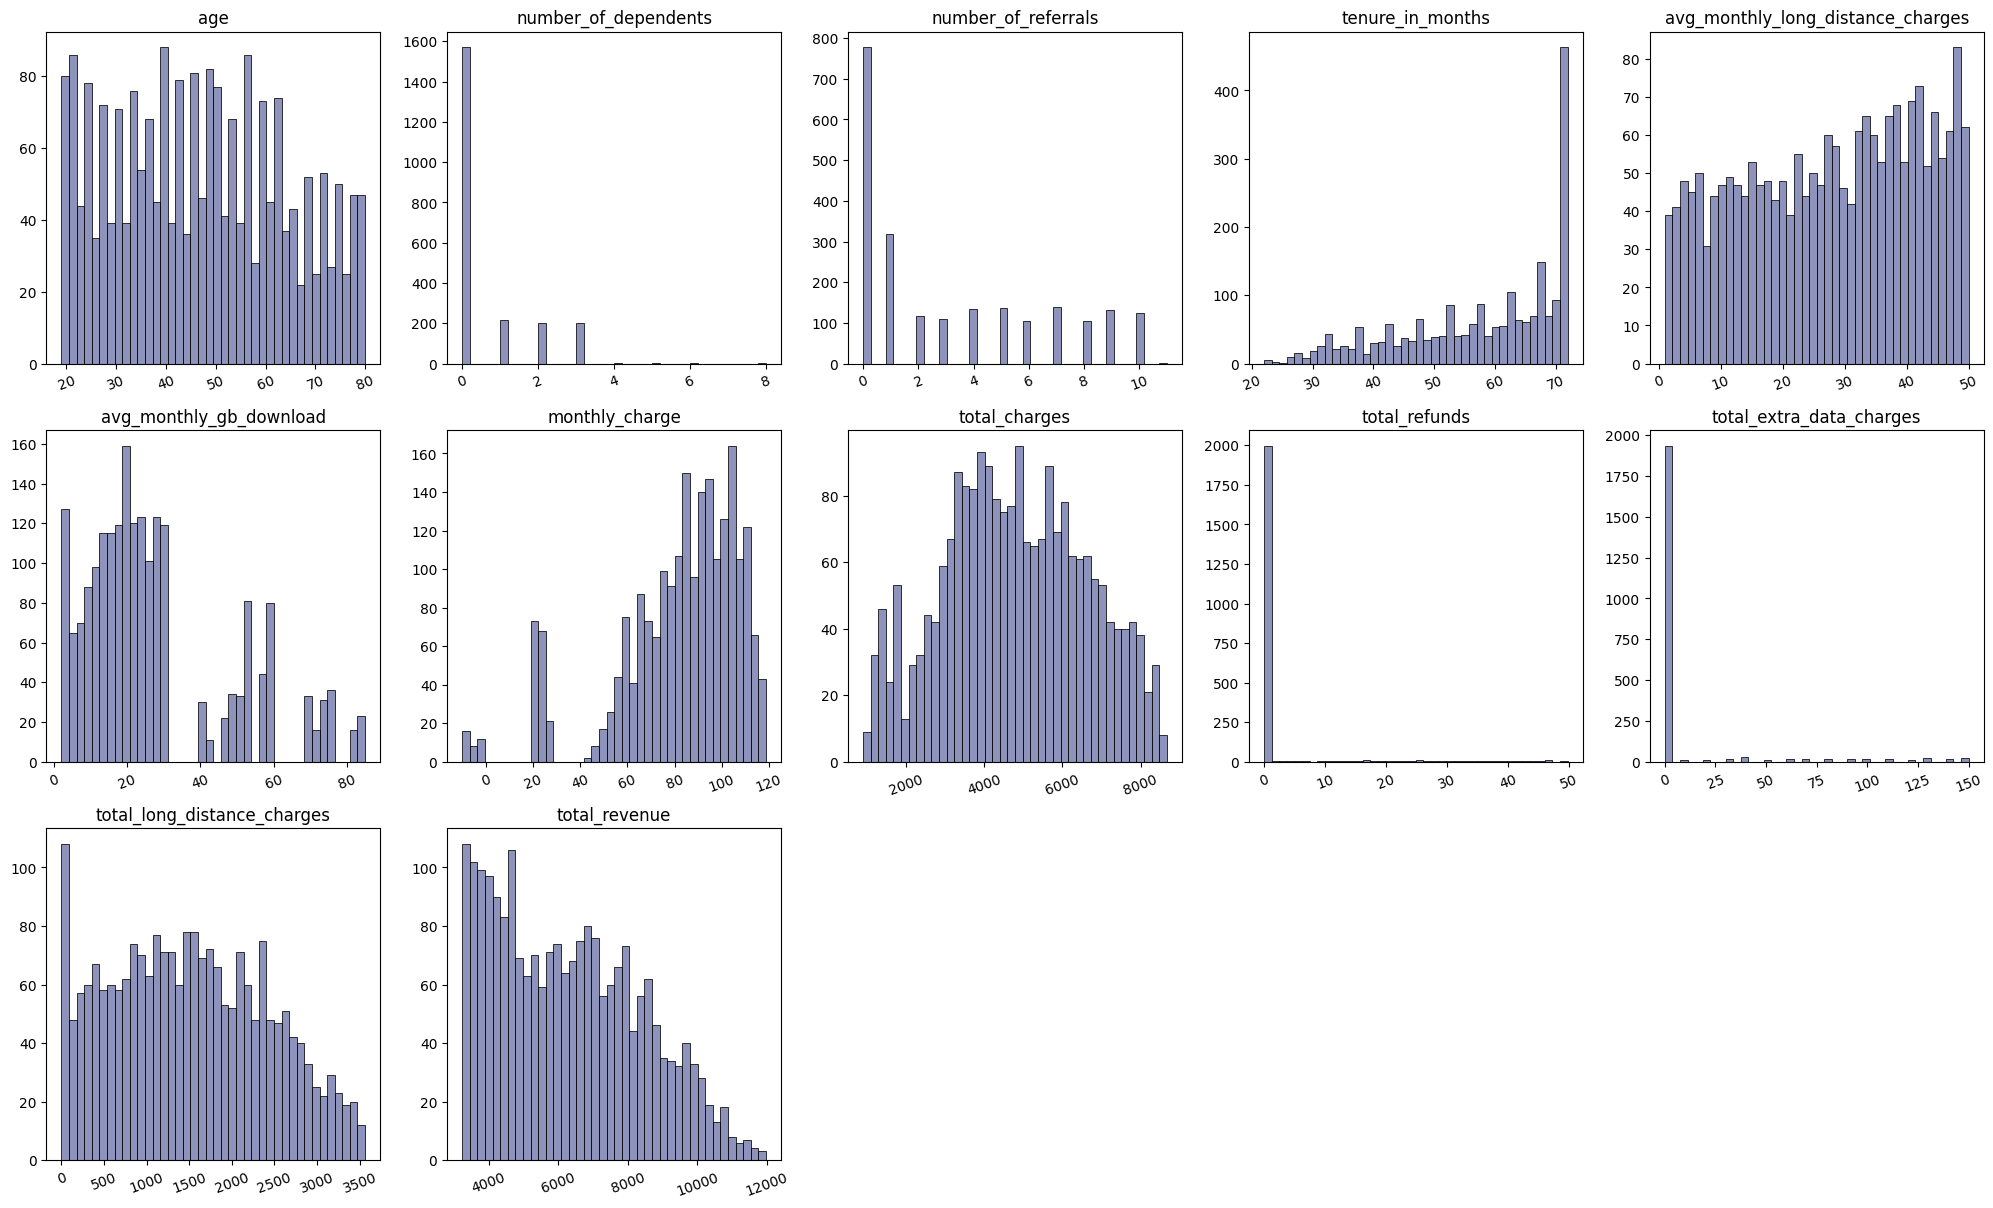

In [16]:
# Select all numerical columns (int or float types)
num = [cname for cname in df_high_value.columns if df_high_value[cname].dtype in ['int64', 'float64']]

# Subset the dataframe with only numerical features
_ = df_high_value[num]

fig = plt.figure(figsize=(25, 25))  # Set figure size for better visibility

i = 1
for n in _.columns:
    plt.subplot(5, 5, i)  # Create a 5x5 grid of subplots
    
    # Plot histogram for each numerical column
    ax = sns.histplot(x=df_high_value[n], color='#676FA3', bins=40)
    
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(n), loc='center')
    plt.xticks(rotation=20, fontsize=10)
    i += 1


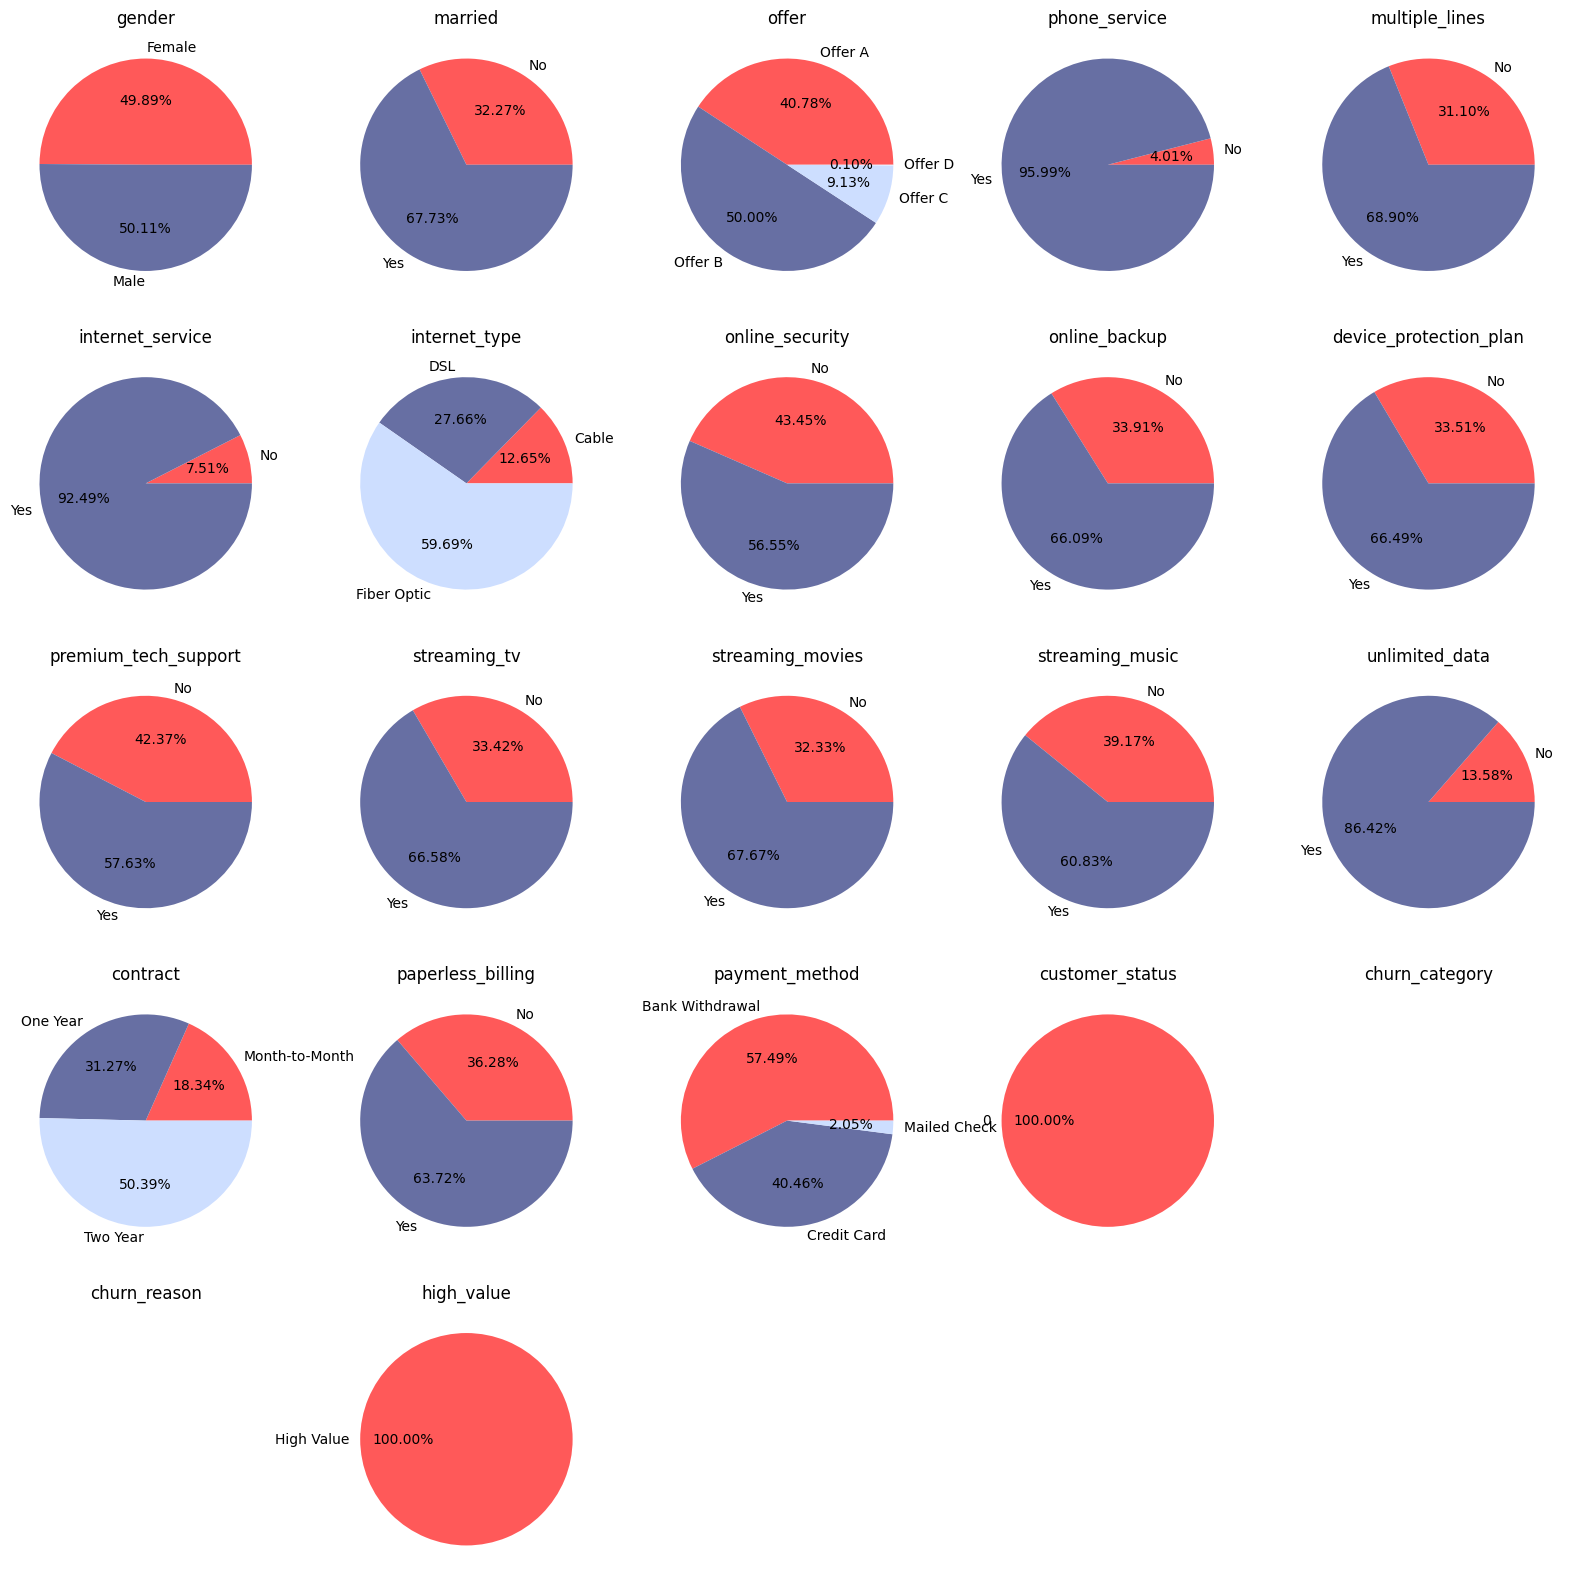

In [17]:
# Select categorical columns with fewer than 10 unique values
cat = [cname for cname in df_high_value.columns if df_high_value[cname].nunique() < 10 and df_high_value[cname].dtype == "object"]

# Create a subset containing only those categorical columns
_ = df_high_value[cat]

fig = plt.figure(figsize=(20, 20))  # Set figure size for clear visualization

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)  # Arrange subplots in a 5x5 grid

    # Plot a pie chart for each categorical column
    ax = df_high_value.groupby([c]).size().plot(
        kind='pie',
        autopct='%.2f%%',
        colors=['#FF5959', '#676FA3', '#CDDEFF', '#EEF2FF']
    )
    
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')  # Add column name as the title
    i += 1


* Churned Customers Profile

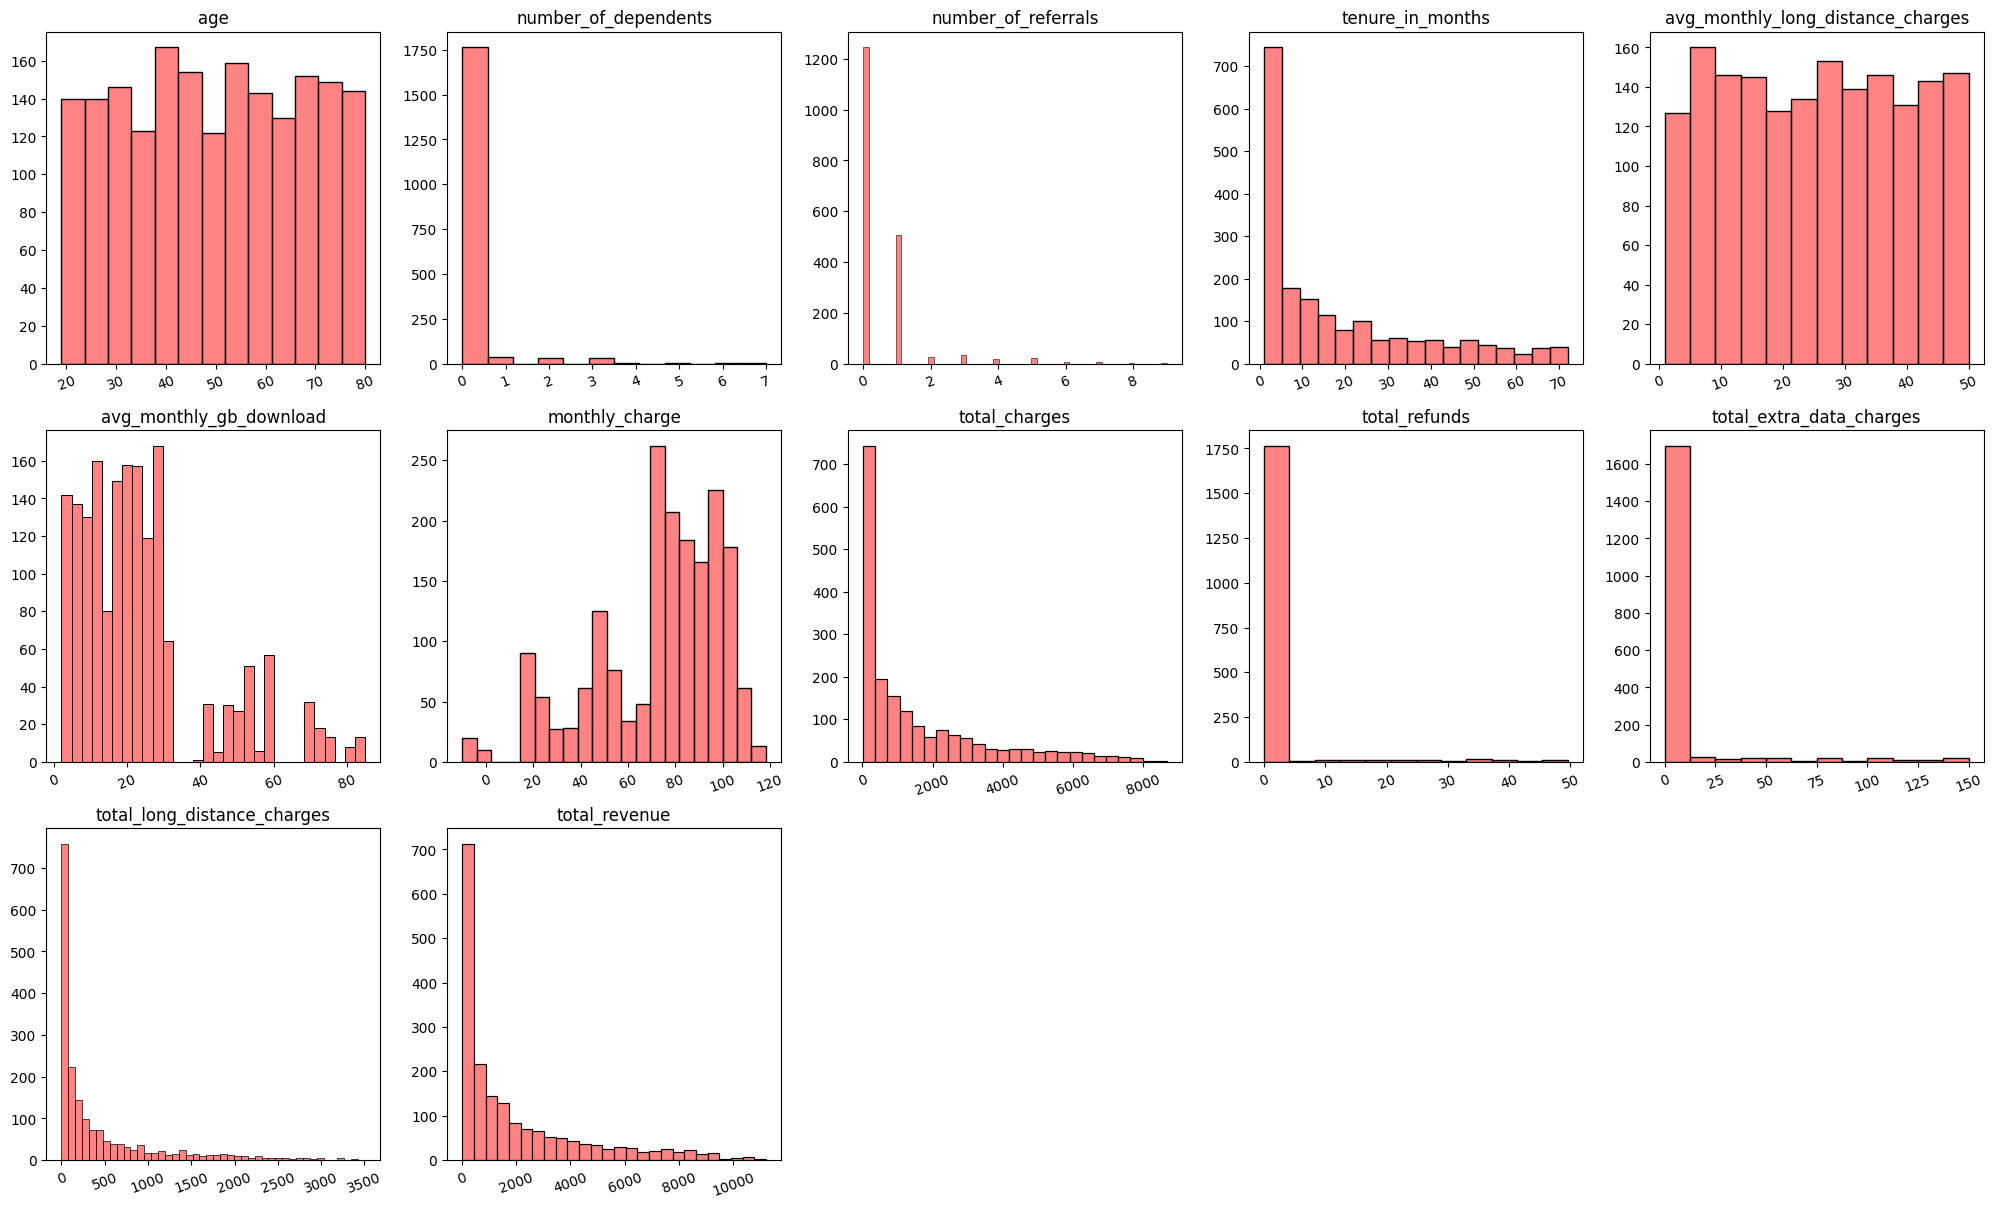

In [18]:
df_churned = dfc.loc[dfc['customer_status'] == 1]

# Select all numeric columns (int or float) from churned customers
num = [cname for cname in df_churned.columns if df_churned[cname].dtype in ['int64', 'float64']]

# Create a subset of only numerical columns
_ = df_churned[num]

fig = plt.figure(figsize=(25, 25))  # Set figure size for multiple histograms

i = 1
for n in _.columns:
    plt.subplot(5, 5, i)  # Create subplot grid
    ax = sns.histplot(x=df_churned[n], color='#FF5959')  # Plot histogram in red tone
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(n), loc='center')  # Show column name as title
    plt.xticks(rotation=20, fontsize=10)
    i += 1


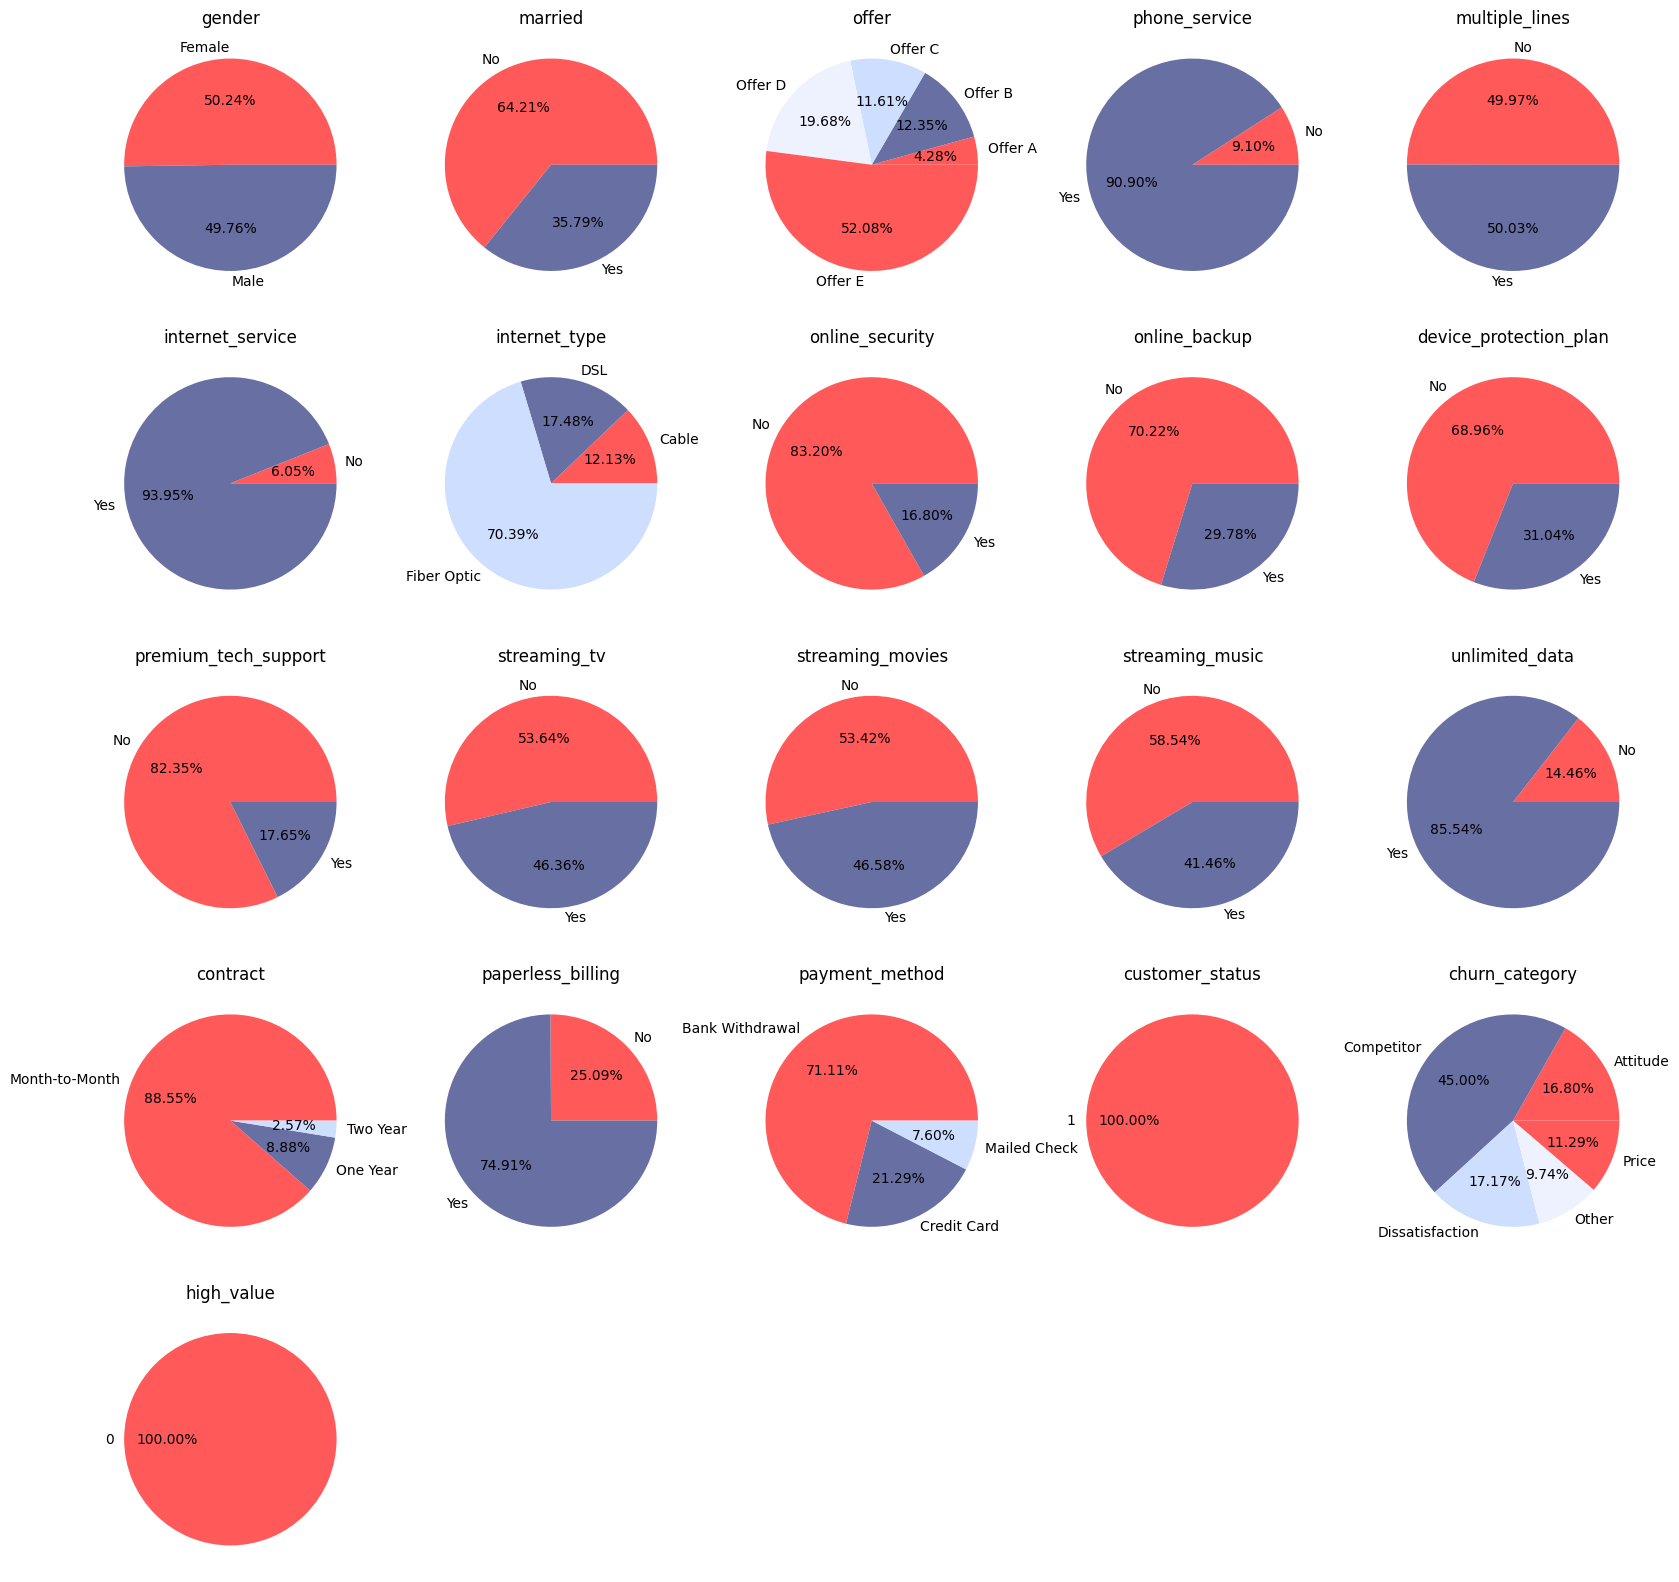

In [19]:
# Select categorical columns with fewer than 10 unique values
cat = [cname for cname in df_churned.columns if df_churned[cname].nunique() < 10 and df_churned[cname].dtype == "object"]

# Create a subset containing only selected categorical columns
_ = df_churned[cat]

fig = plt.figure(figsize=(20, 20))  

i = 1
for c in _.columns:
    plt.subplot(5, 5, i)  # Arrange plots in a grid
    
    # Create pie chart for each categorical feature
    ax = df_churned.groupby([c]).size().plot(
        kind='pie',
        autopct='%.2f%%',
        colors=['#FF5959', '#676FA3', '#CDDEFF', '#EEF2FF']
    )
    
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(c), loc='center')  
    i += 1


### Assessment of the Customer Groups

**High Value Customers Profile**
- **67.73%** are married.
- They haven't purchased **Offer E.**
- More than half of these customers have subscribed to additional **internet services** (i.e. backup, security, protection plan, tech support) and **streaming services** (TV, movies, music).
- Out of the **81.66%** who are subsribed to long term contracts, **50.39%** opted for the two-year contract, and the remaining **31.27%** went for one year.

**Churned Customers Profile**
- Only **35.79%** are married.
- **Offer E** appears to be the most popular offer around churned customers. Perhaps the company may want to review and look for potential pain points about this offer. 
- More than half of churned customers haven't subscribed to additional **internet services** and **streaming services**.
-  **88.55%** choose to pay their bills at a monthly basis.

**What they have in common?**
- Equal distribution in terms of gender.
- **Fiber optic** internet service is popular among both customer groups.
- Majority enjoy **unlimited data.**
- Majority prefers to receive **paperless billing** and pay the bills by **bank withdrawal**.